In [1]:
import json
import os

RESULTS_DIR = '../experiments/results/'

def read_json(path):
    with open(path, 'r') as f: 
        res = json.load(f)
    return res
tasks = read_json('../experiments/tasks.json')
results = [read_json(os.path.join(RESULTS_DIR, path)) for path in os.listdir(RESULTS_DIR)]


# Графики

* качество lptn от ранга
* качество разных алгоритмов от числа кубит
* время обучения для разных алгоритмов и кубит
* число шагов для разных алгоритмов и кубит
* потребляемая память для разных алгоритмов и кубит
* гистограмма fidelity для lptn

In [2]:
qubits_range = list(range(1,8))

### Качество lptn от ранга

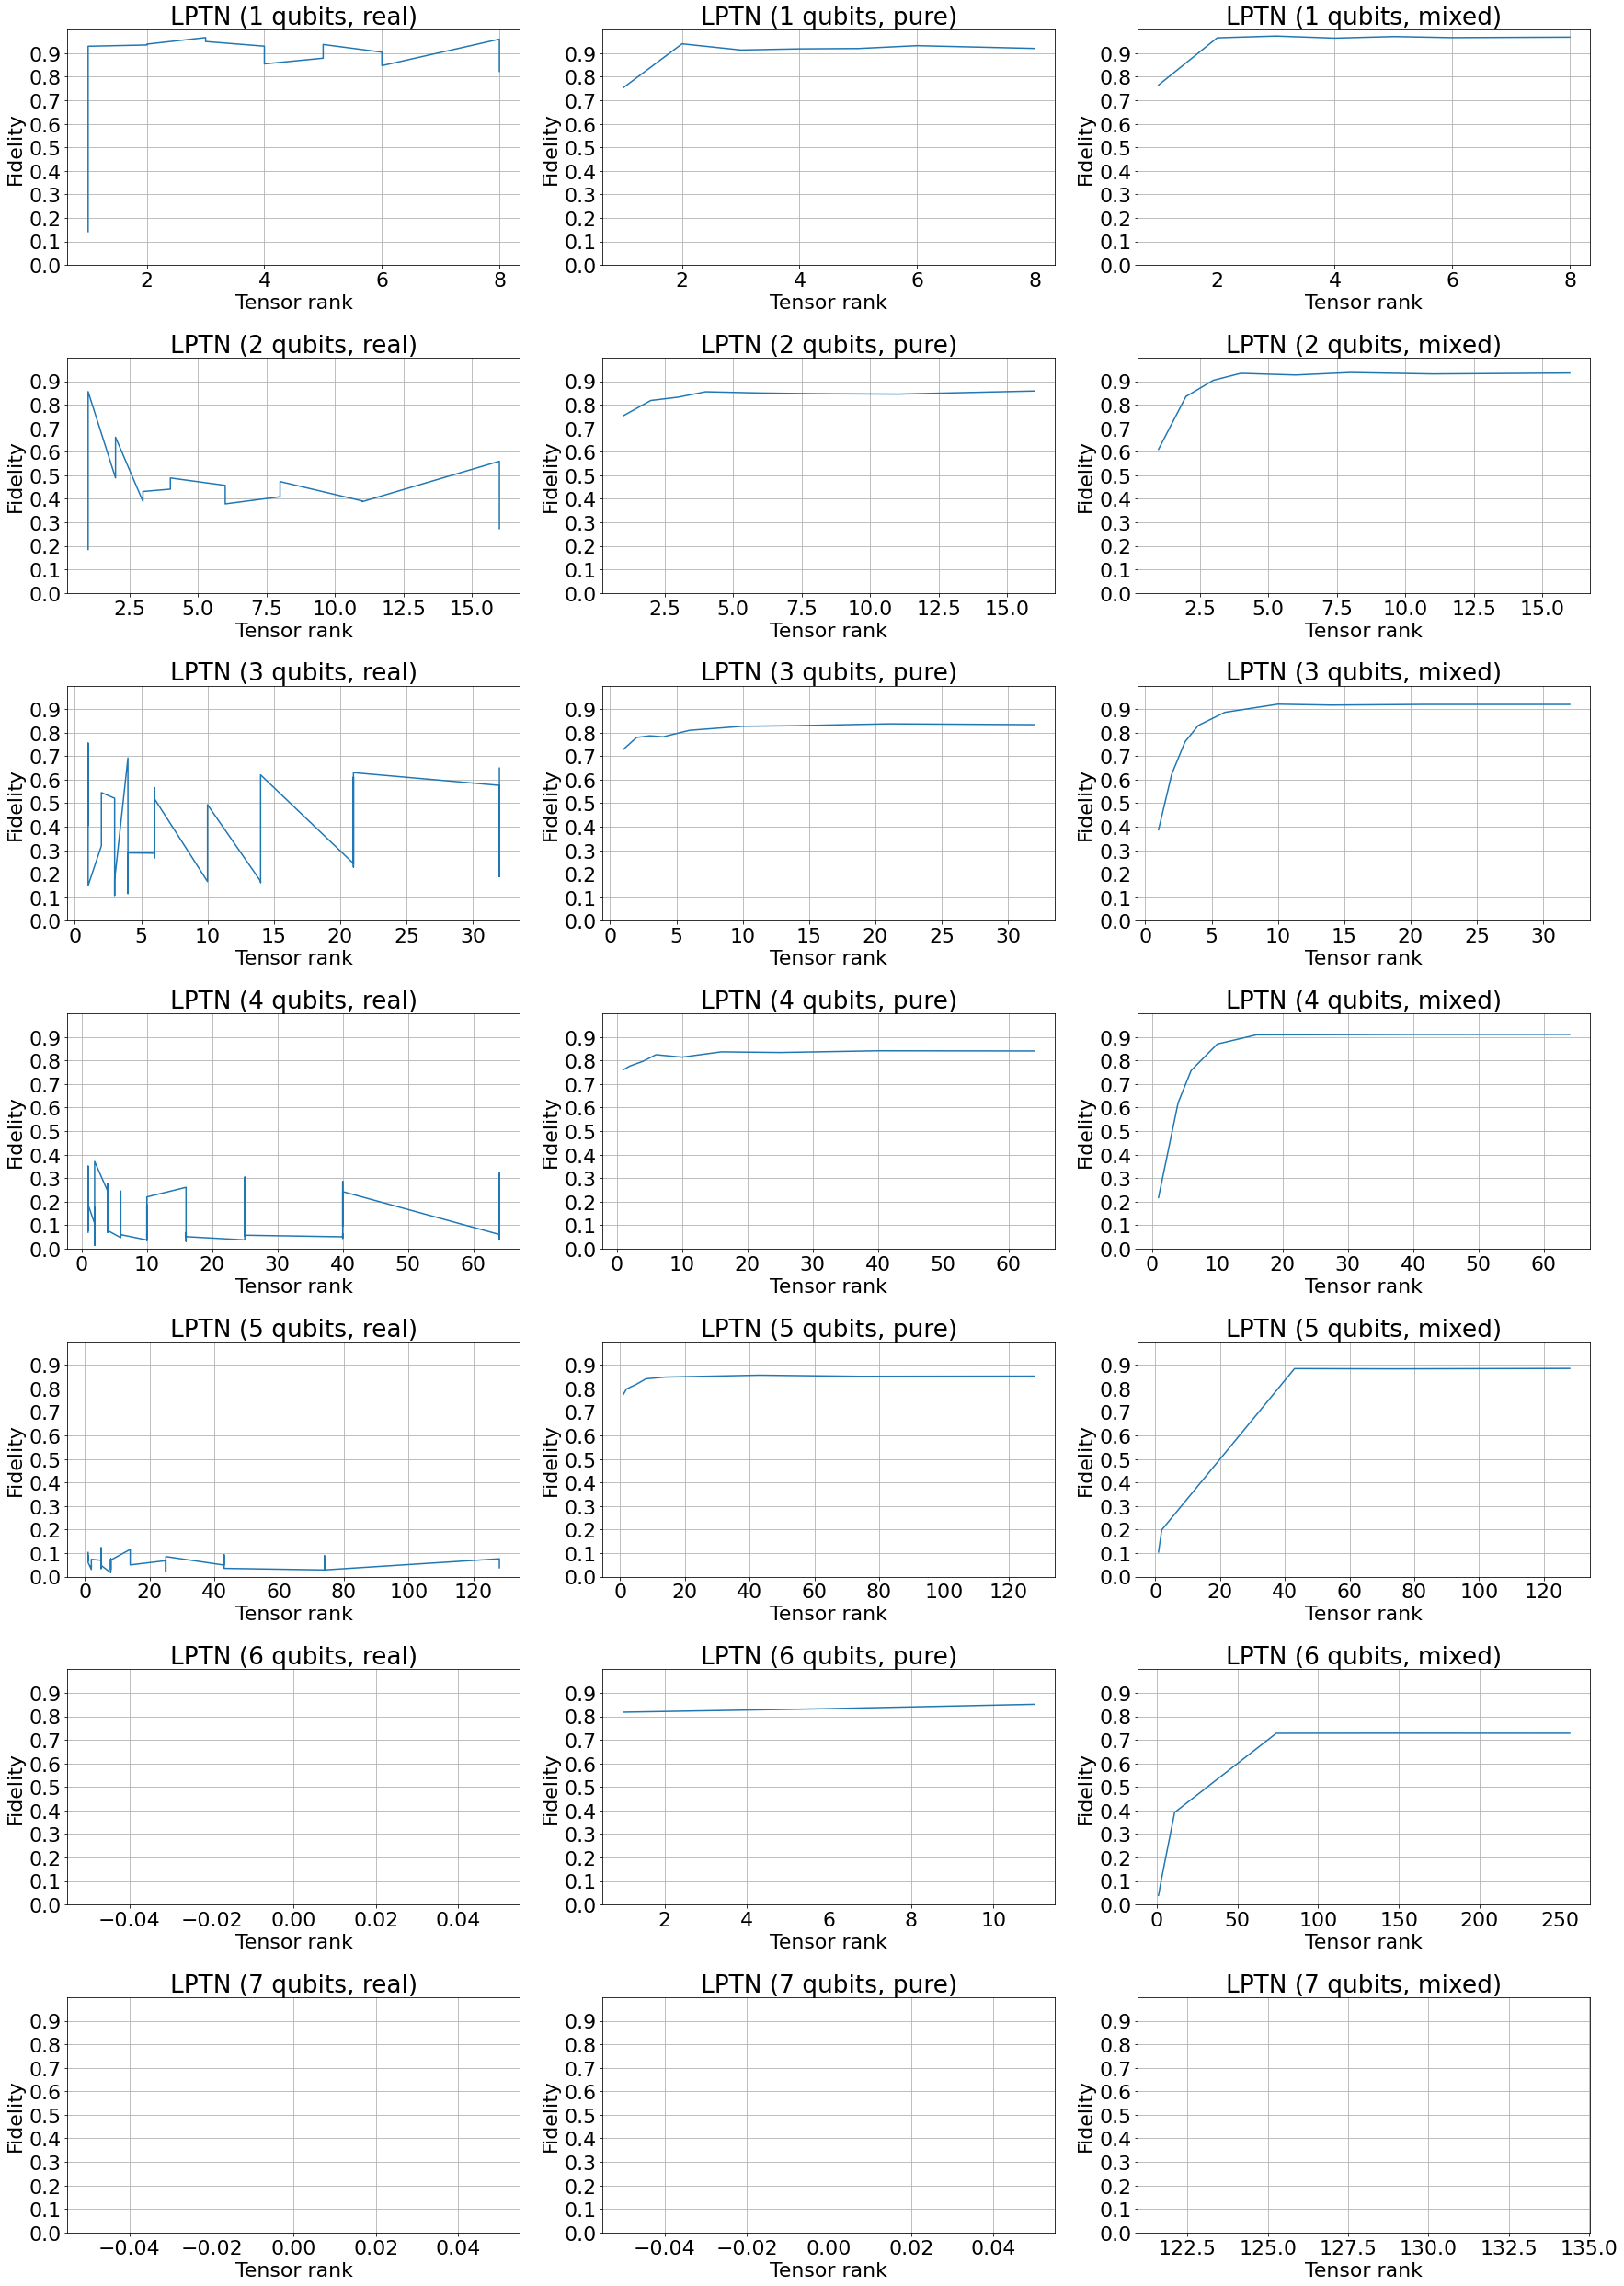

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(25,5*len(qubits_range)))
plt.rcParams.update({'font.size': 22})


for n_qubits in qubits_range:
    for i, data_type in enumerate(['real', 'pure', 'mixed']):
        plt.subplot(len(qubits_range), 3, 3*(n_qubits - 1) + i+1)
        filtered_results = [res for res in results if all([res['args']['algorithm'] == 'lptn', 
                                                           res['args']['data_type'] == data_type,
                                                           res['args']['n_qubits'] == n_qubits])]

        tensor_ranks = np.array([res['args']['tensor_rank'] for res in filtered_results])
        fidelities = np.array([np.mean([max(x['fidelities']) for x in res['results']]) for res in filtered_results])
        sorted_idx = np.argsort(tensor_ranks)
        plt.ylabel('Fidelity')
        plt.xlabel('Tensor rank')
        plt.title(f'LPTN ({n_qubits} qubits, {data_type})')
        plt.yticks([0.1*i for i in range(10)])
        plt.ylim((0,1))
        plt.grid()
        plt.plot(tensor_ranks[sorted_idx], fidelities[sorted_idx])
plt.tight_layout()

## Гистограмма fidelity для lptn

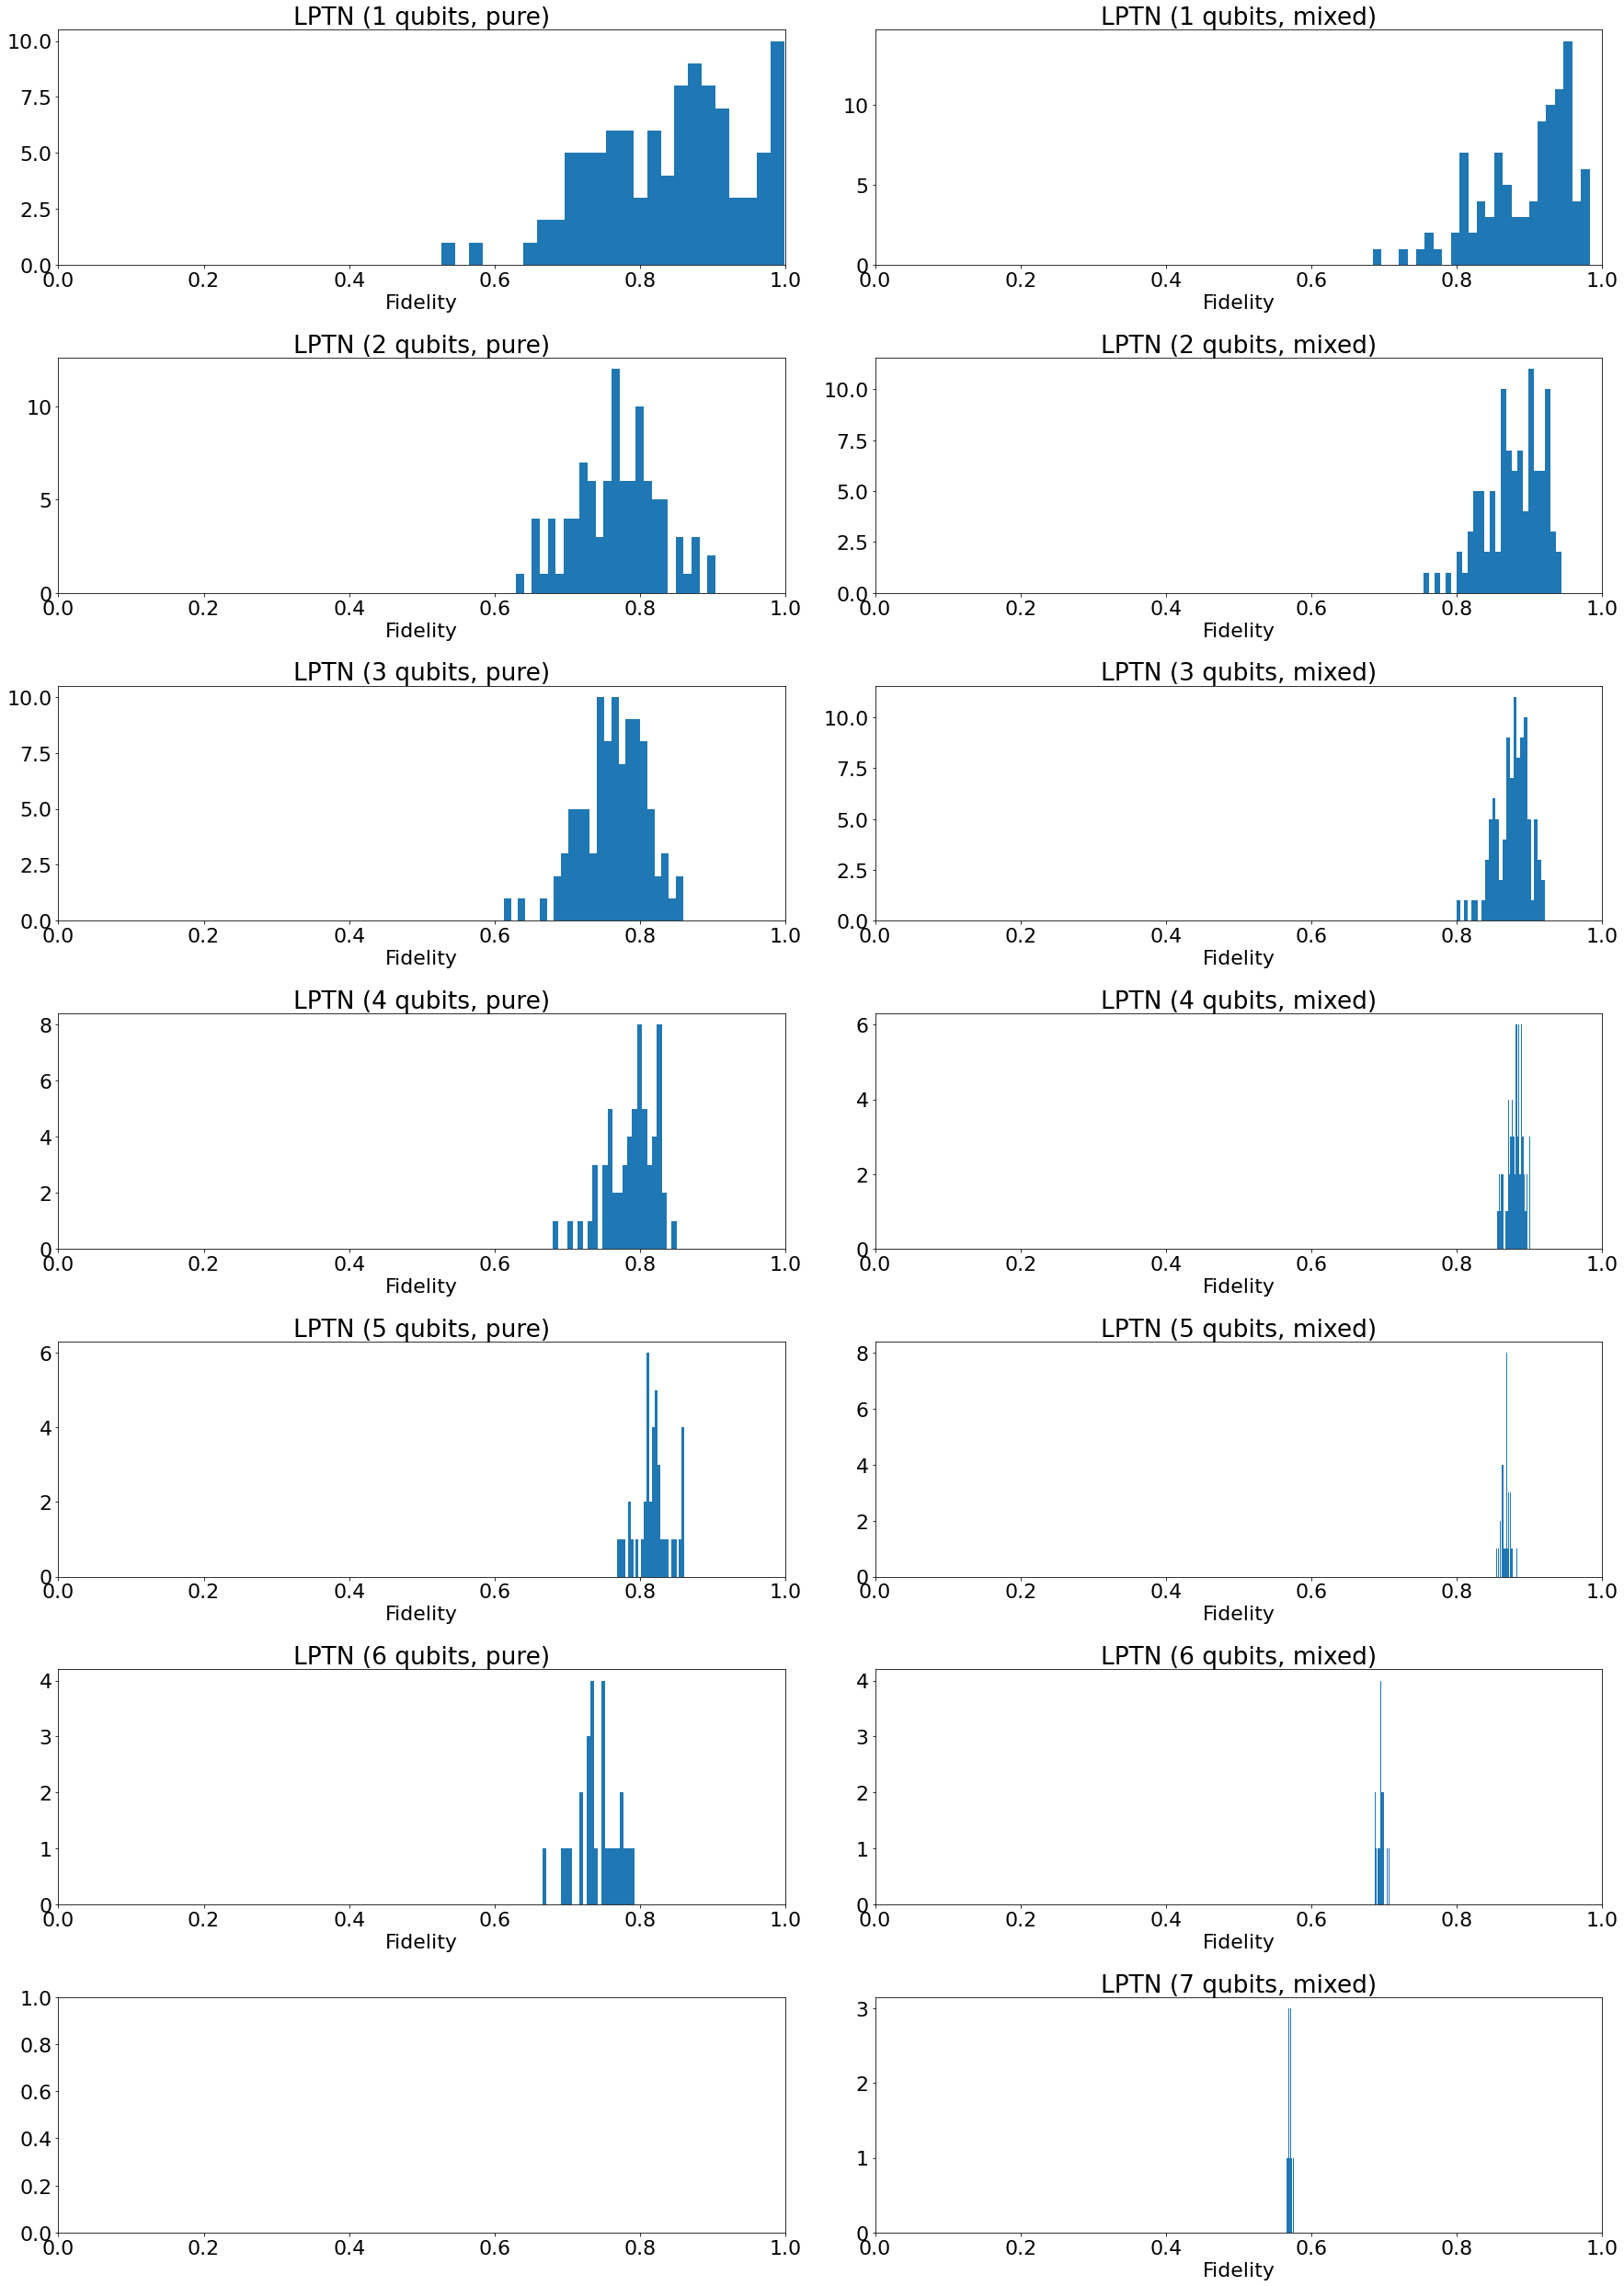

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(25,5*len(qubits_range)))
plt.rcParams.update({'font.size': 22})


for n_qubits in qubits_range:
    for i, data_type in enumerate(['pure', 'mixed']):
        plt.subplot(len(qubits_range), 2, 2*(n_qubits - 1) + i+1)
        filtered_results = [res for res in results if all([res['args']['algorithm'] == 'lptn', 
                                                           res['args']['data_type'] == data_type,
                                                           res['args']['n_qubits'] == n_qubits])]
        if len(filtered_results) == 0: continue
        tensor_ranks = np.array([res['args']['tensor_rank'] for res in filtered_results])
        fidelities = np.array([[np.mean(x['fidelities']) for x in res['results']] for res in filtered_results])
        sorted_idx = np.argsort(tensor_ranks)
        fidelities = fidelities[sorted_idx[-1]]
        plt.xlabel('Fidelity')
        plt.title(f'LPTN ({n_qubits} qubits, {data_type})')
        plt.hist(fidelities, bins=25)
        plt.xlim((0,1))
plt.tight_layout()

## Качество разных алгоритмов от числа кубит

In [5]:
qubits_range = list(range(1,6))

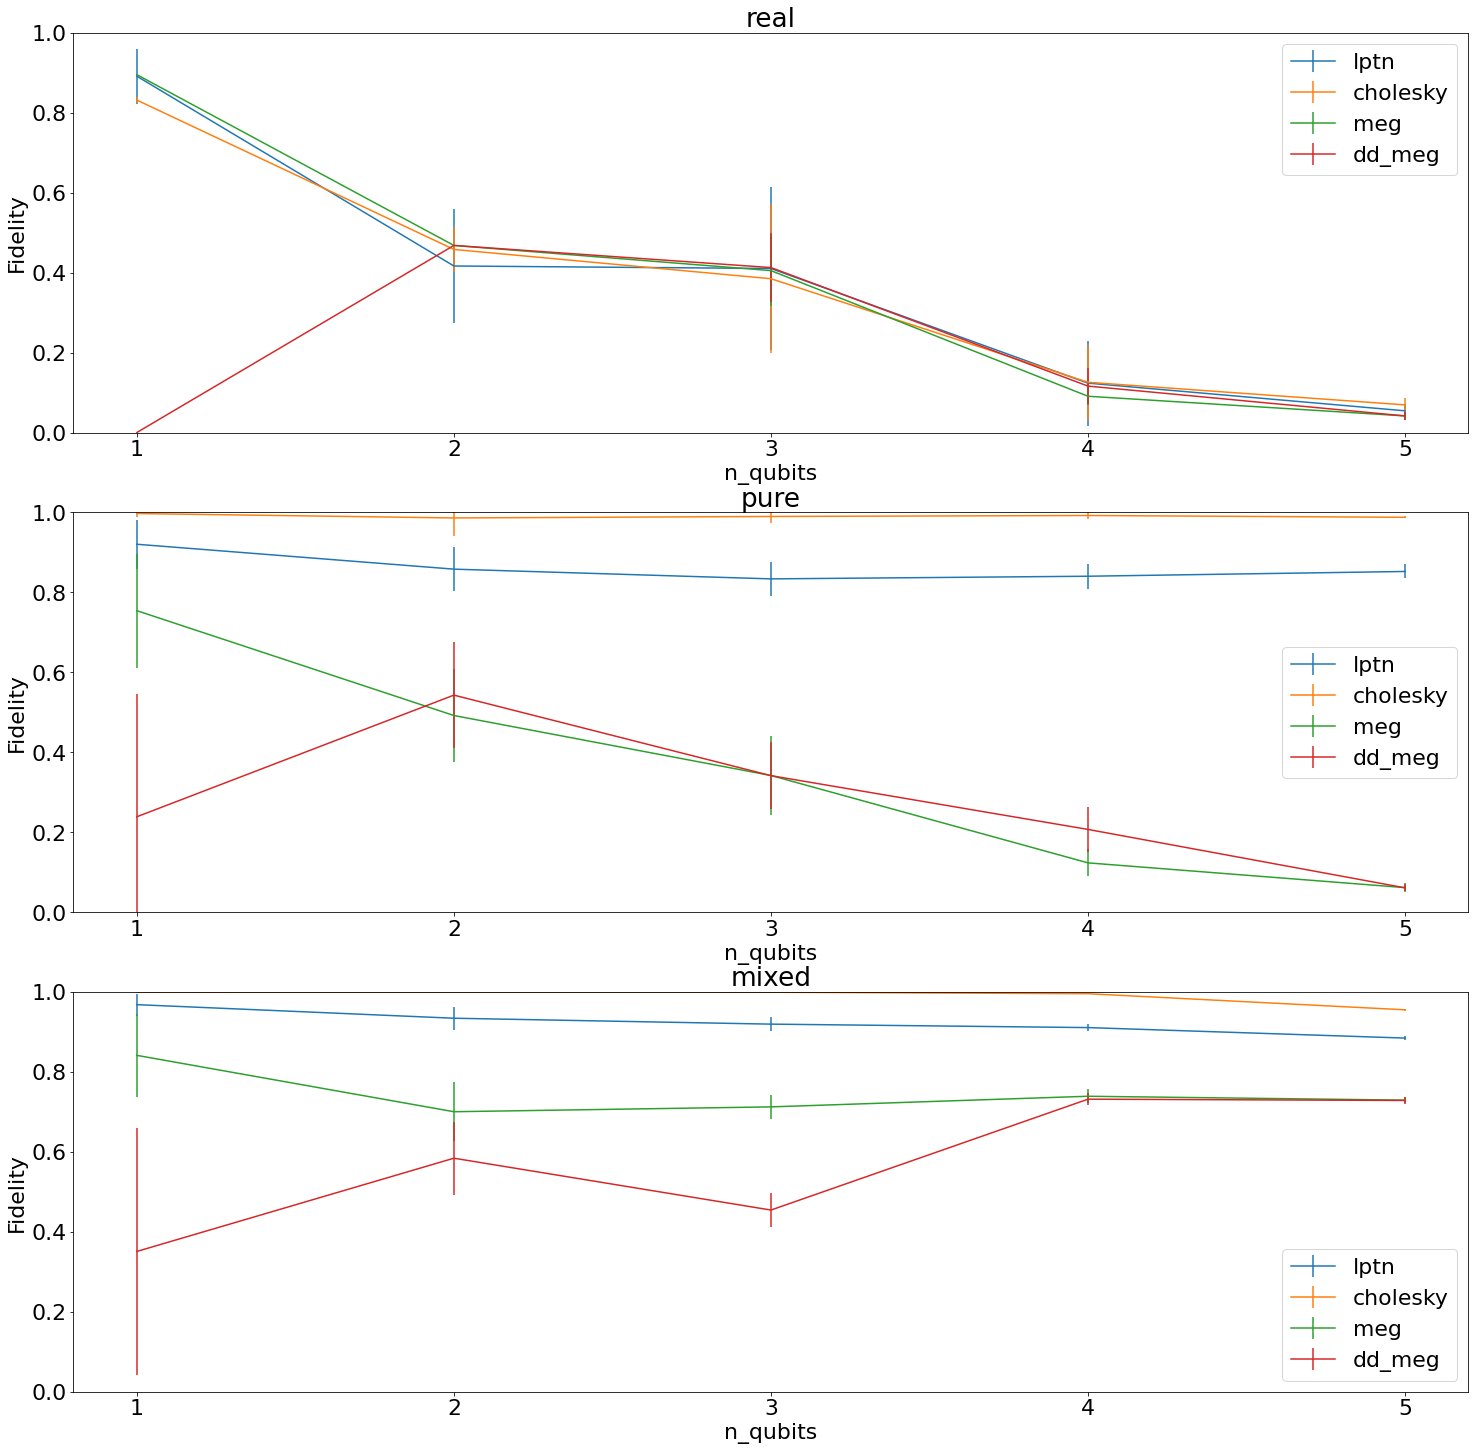

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(25,25))
plt.rcParams.update({'font.size': 22})

for i, data_type in enumerate(['real', 'pure', 'mixed']):
    algorithms = {'lptn': [], 'cholesky': [], 'meg': [], 'dd_meg': []}
    for algorithm in algorithms:
        for n_qubits in qubits_range:
            filtered_results = [res for res in results if all([res['args']['algorithm'] == algorithm, 
                                                               res['args']['data_type'] == data_type,
                                                               res['args']['n_qubits'] == n_qubits])]
            
            if len(filtered_results) == 0: 
                algorithms[algorithm].append((0,0))
                continue
            fidelities = np.array([[max(x['fidelities']) for x in res['results']] for res in filtered_results])
            if algorithm == 'lptn':
                tensor_ranks = np.array([res['args']['tensor_rank'] for res in filtered_results])
                fidelities = fidelities[tensor_ranks == max(tensor_ranks)]
            algorithms[algorithm].append((np.mean(fidelities), np.std(fidelities)))
    plt.subplot(3,1,i+1)
    plt.title(f'{data_type}')
    for algorithm_name, values in algorithms.items():
        plt.errorbar(qubits_range, [x[0] for x in values], yerr=[x[1] for x in values], label=algorithm_name)
        plt.xticks(qubits_range)
        plt.xlabel('n_qubits')
        plt.ylabel("Fidelity")
        plt.ylim((0,1))
#         plt.yscale('log')
    plt.legend()

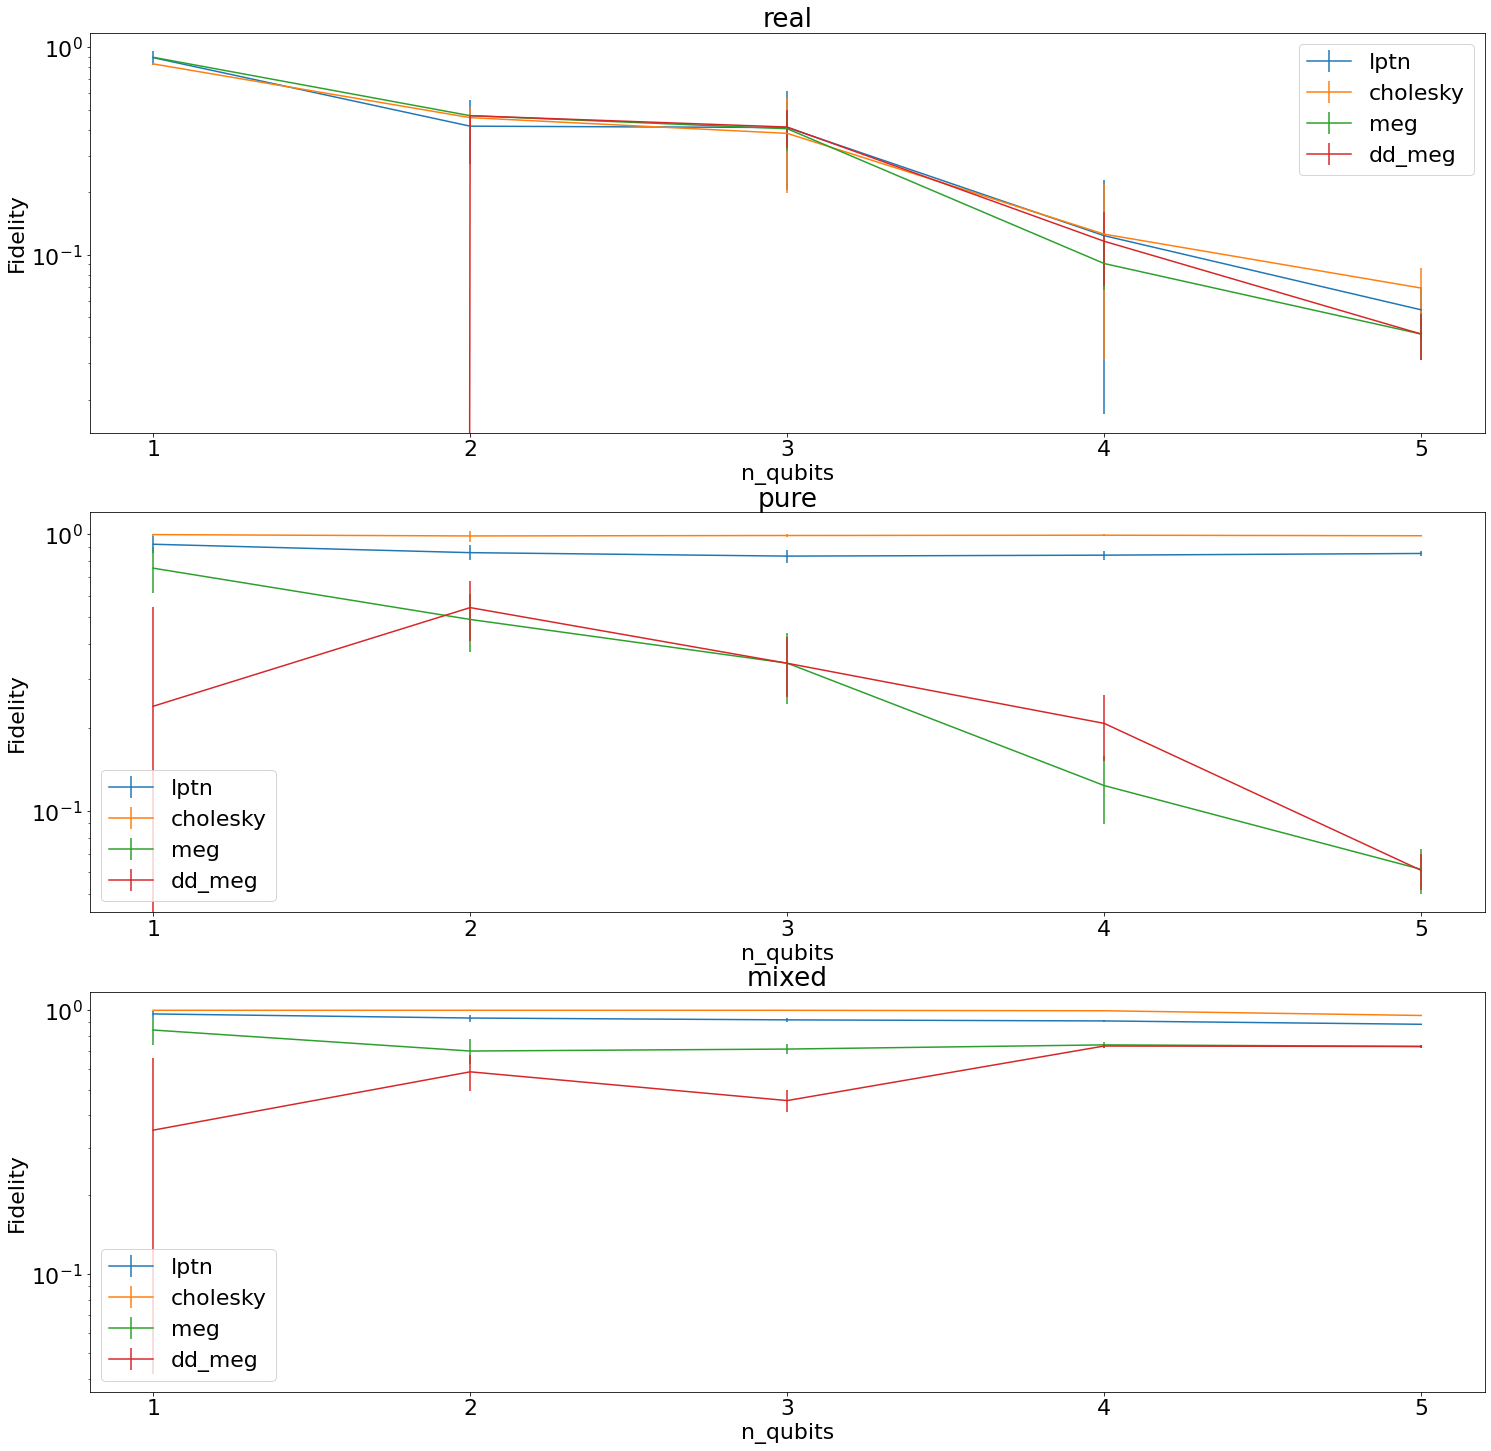

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(25,25))
plt.rcParams.update({'font.size': 22})

for i, data_type in enumerate(['real', 'pure', 'mixed']):
    algorithms = {'lptn': [], 'cholesky': [], 'meg': [], 'dd_meg': []}
    for algorithm in algorithms:
        for n_qubits in qubits_range:
            filtered_results = [res for res in results if all([res['args']['algorithm'] == algorithm, 
                                                               res['args']['data_type'] == data_type,
                                                               res['args']['n_qubits'] == n_qubits])]
            
            if len(filtered_results) == 0: 
                algorithms[algorithm].append((0,0))
                continue
            fidelities = np.array([[max(x['fidelities']) for x in res['results']] for res in filtered_results])
            if algorithm == 'lptn':
                tensor_ranks = np.array([res['args']['tensor_rank'] for res in filtered_results])
                fidelities = fidelities[tensor_ranks == max(tensor_ranks)]
            algorithms[algorithm].append((np.mean(fidelities), np.std(fidelities)))
    plt.subplot(3,1,i+1)
    plt.title(f'{data_type}')
    for algorithm_name, values in algorithms.items():
        plt.errorbar(qubits_range, [x[0] for x in values], yerr=[x[1] for x in values], label=algorithm_name)
        plt.xticks(qubits_range)
        plt.xlabel('n_qubits')
        plt.ylabel("Fidelity")
#         plt.ylim((0,1))
        plt.yscale('log')
    plt.legend()

## Время обучения для разных алгоритмов и кубит

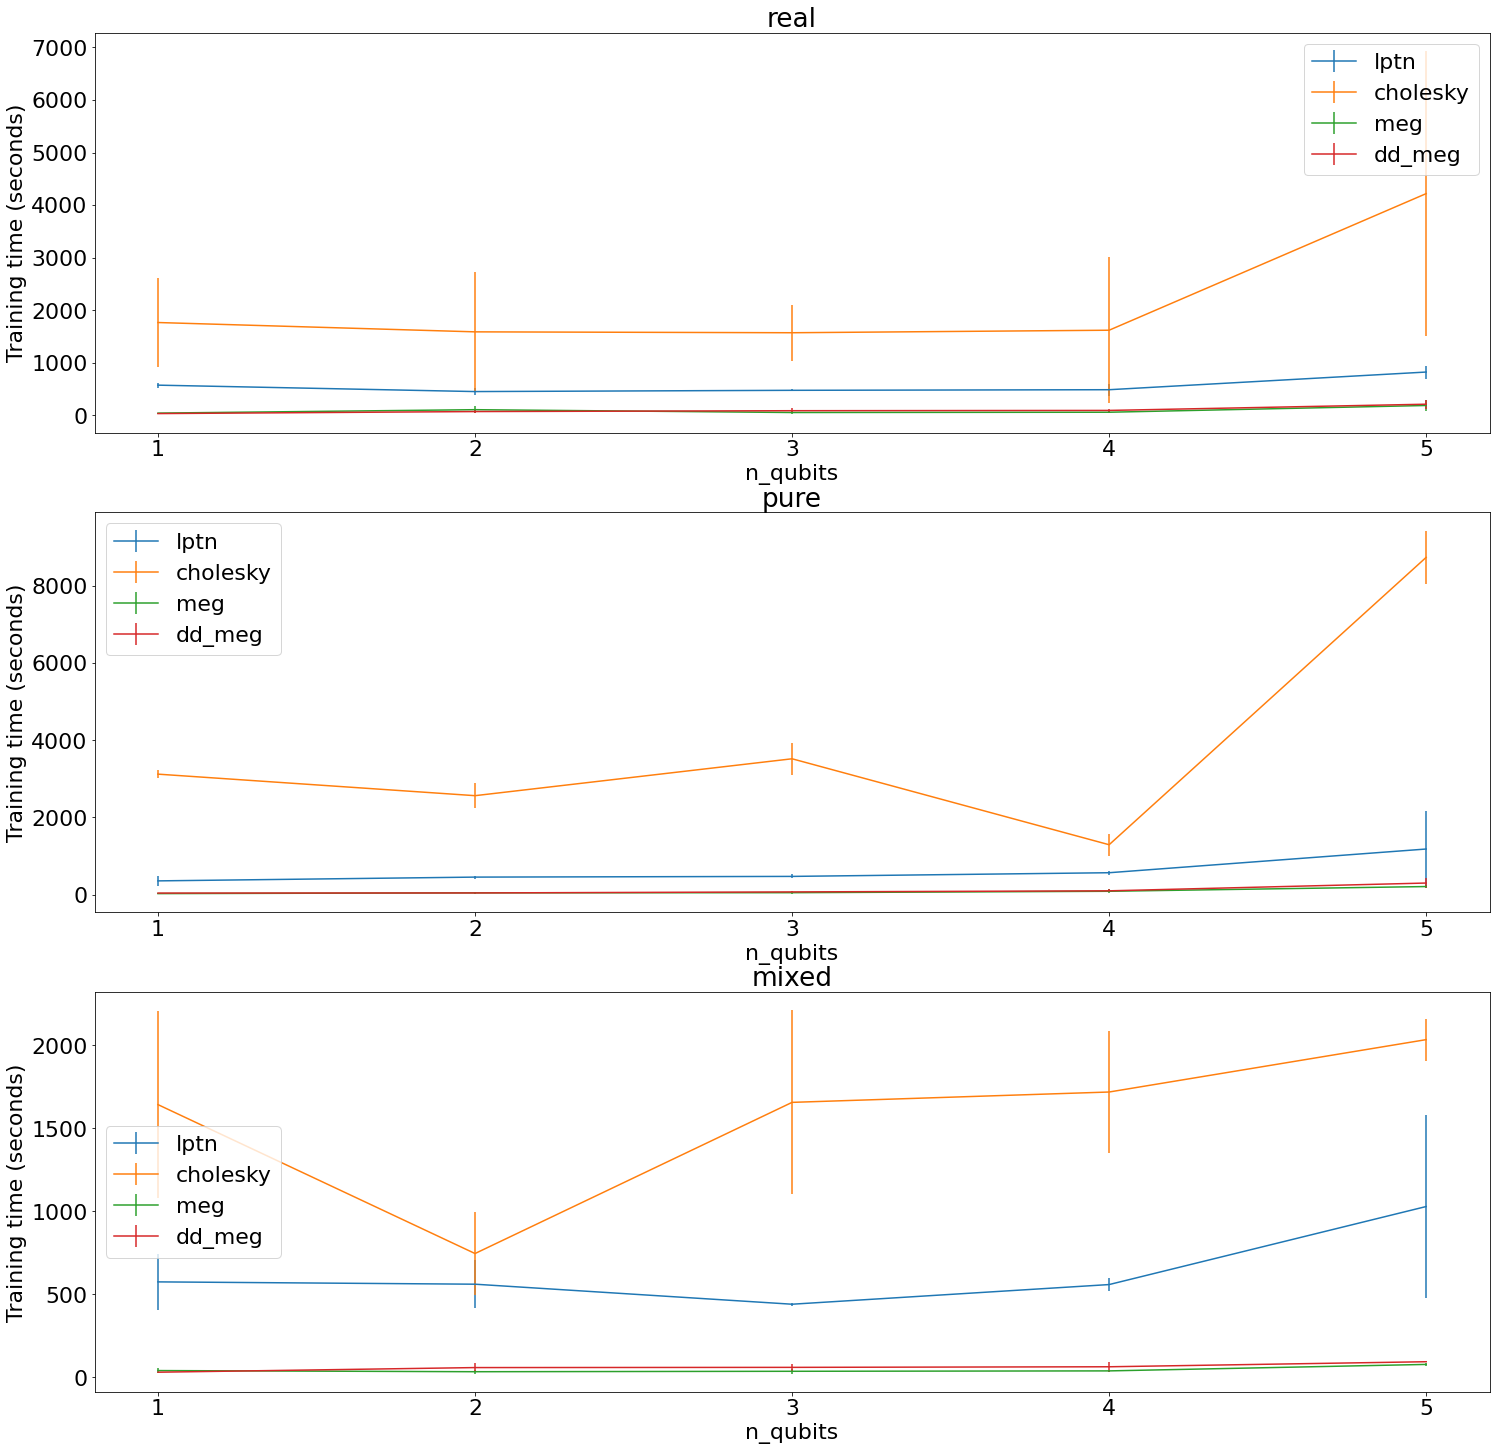

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(25,25))
plt.rcParams.update({'font.size': 22})

for i, data_type in enumerate(['real', 'pure', 'mixed']):
    algorithms = {'lptn': [], 'cholesky': [], 'meg': [], 'dd_meg': []}
    for algorithm in algorithms:
        for n_qubits in qubits_range:
            filtered_results = [res for res in results if all([res['args']['algorithm'] == algorithm, 
                                                               res['args']['data_type'] == data_type,
                                                               res['args']['n_qubits'] == n_qubits])]
            
            if len(filtered_results) == 0: 
                algorithms[algorithm].append((0,0))
                continue
            training_time = np.array([[x['time'] for x in res['results']] for res in filtered_results])
            if algorithm == 'lptn':
                tensor_ranks = np.array([res['args']['tensor_rank'] for res in filtered_results])
                training_time = training_time[tensor_ranks == max(tensor_ranks)]
            algorithms[algorithm].append((np.mean(training_time), np.std(training_time)))
    plt.subplot(3,1,i+1)
    plt.title(f'{data_type}')
    for algorithm_name, values in algorithms.items():
        plt.errorbar(qubits_range, [x[0] for x in values], yerr=[x[1] for x in values], label=algorithm_name)
        plt.xticks(qubits_range)
        plt.xlabel('n_qubits')
        plt.ylabel("Training time (seconds)")
#         plt.ylim((0,1))
#         plt.yscale('log')
    plt.legend()

## Число шагов для разных алгоритмов и кубит

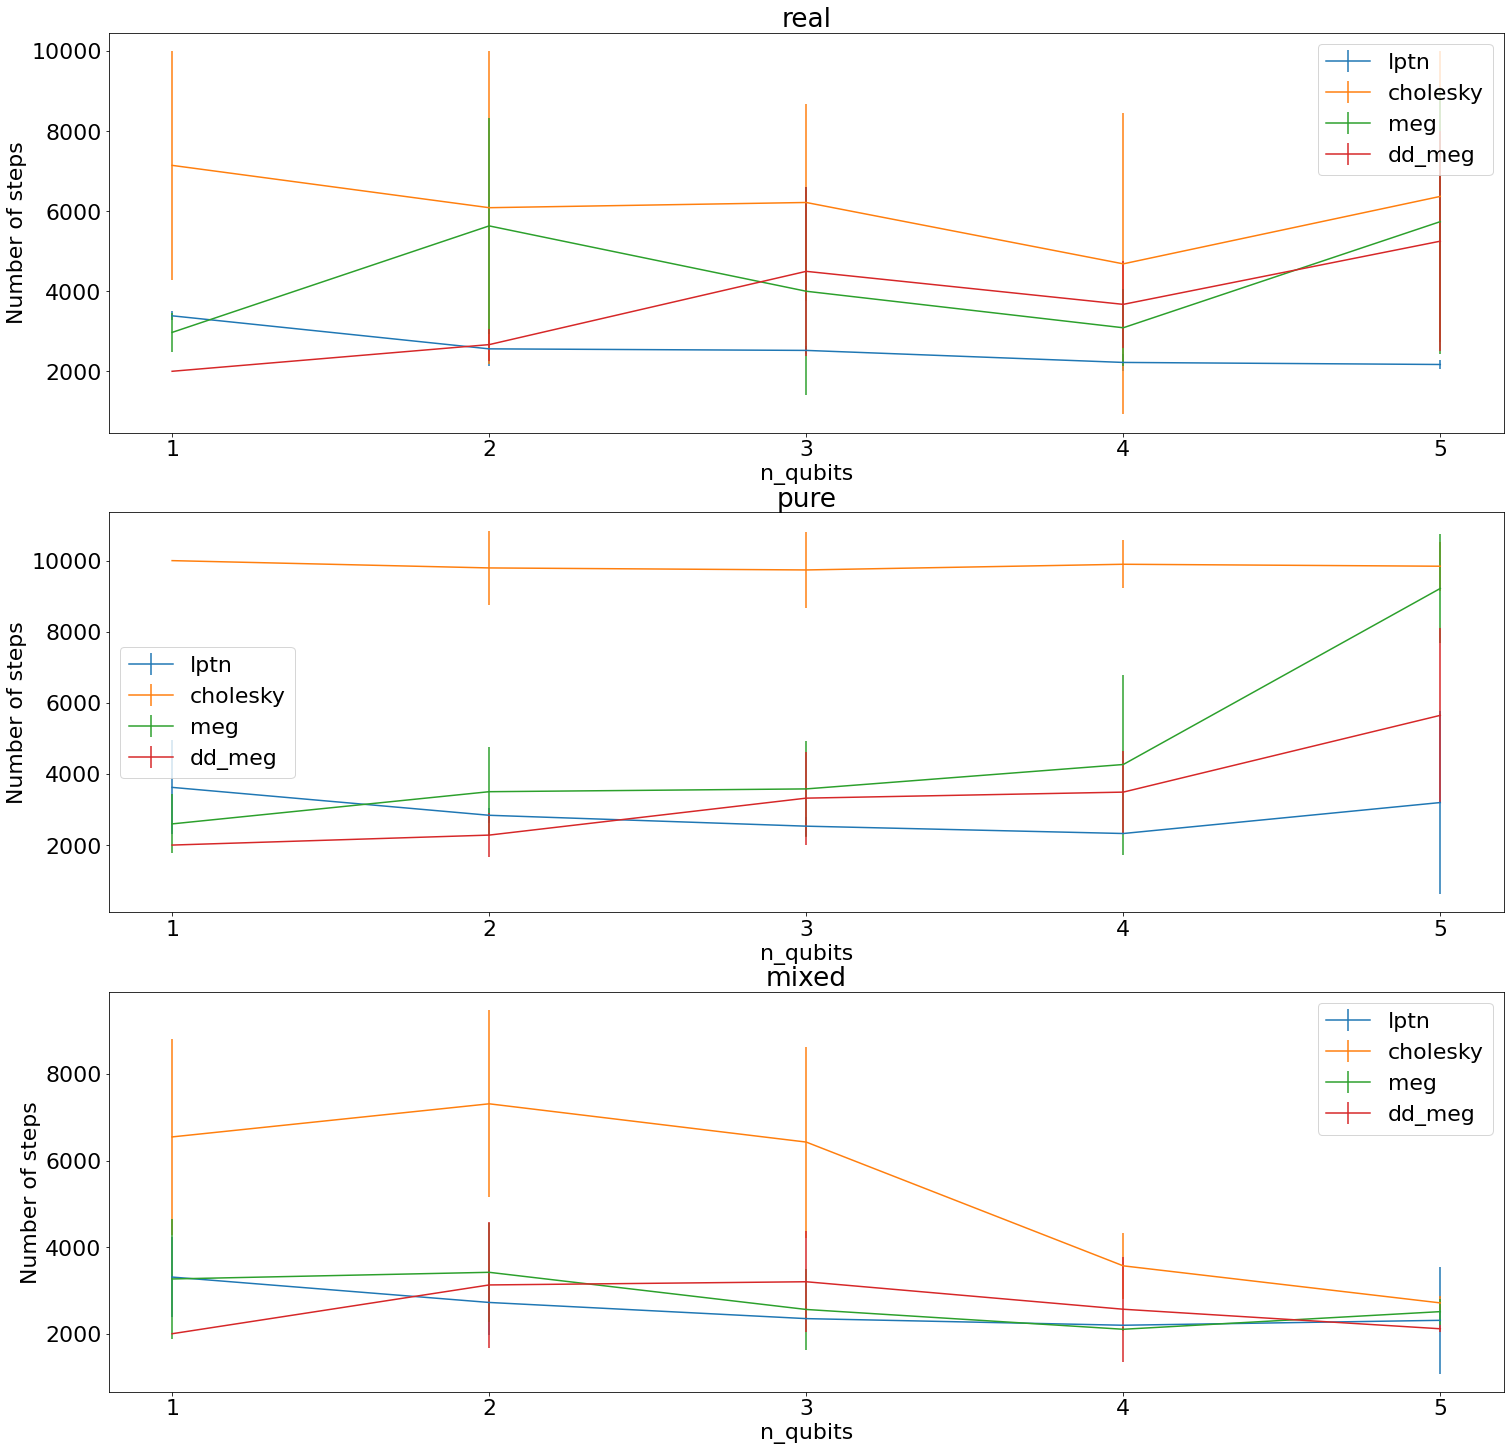

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(25,25))
plt.rcParams.update({'font.size': 22})

for i, data_type in enumerate(['real', 'pure', 'mixed']):
    algorithms = {'lptn': [], 'cholesky': [], 'meg': [], 'dd_meg': []}
    for algorithm in algorithms:
        for n_qubits in qubits_range:
            filtered_results = [res for res in results if all([res['args']['algorithm'] == algorithm, 
                                                               res['args']['data_type'] == data_type,
                                                               res['args']['n_qubits'] == n_qubits])]
            
            if len(filtered_results) == 0: 
                algorithms[algorithm].append((0,0))
                continue
            num_steps = np.array([[x['num_steps'] for x in res['results']] for res in filtered_results])
            if algorithm == 'lptn':
                tensor_ranks = np.array([res['args']['tensor_rank'] for res in filtered_results])
                num_steps = num_steps[tensor_ranks == max(tensor_ranks)]
            algorithms[algorithm].append((np.mean(num_steps), np.std(num_steps)))
    plt.subplot(3,1,i+1)
    plt.title(f'{data_type}')
    for algorithm_name, values in algorithms.items():
        plt.errorbar(qubits_range, [x[0] for x in values], yerr=[x[1] for x in values], label=algorithm_name)
        plt.xticks(qubits_range)
        plt.xlabel('n_qubits')
        plt.ylabel("Number of steps")
#         plt.ylim((0,1))
#         plt.yscale('log')
    plt.legend()

## Потребляемая память для разных алгоритмов и кубит

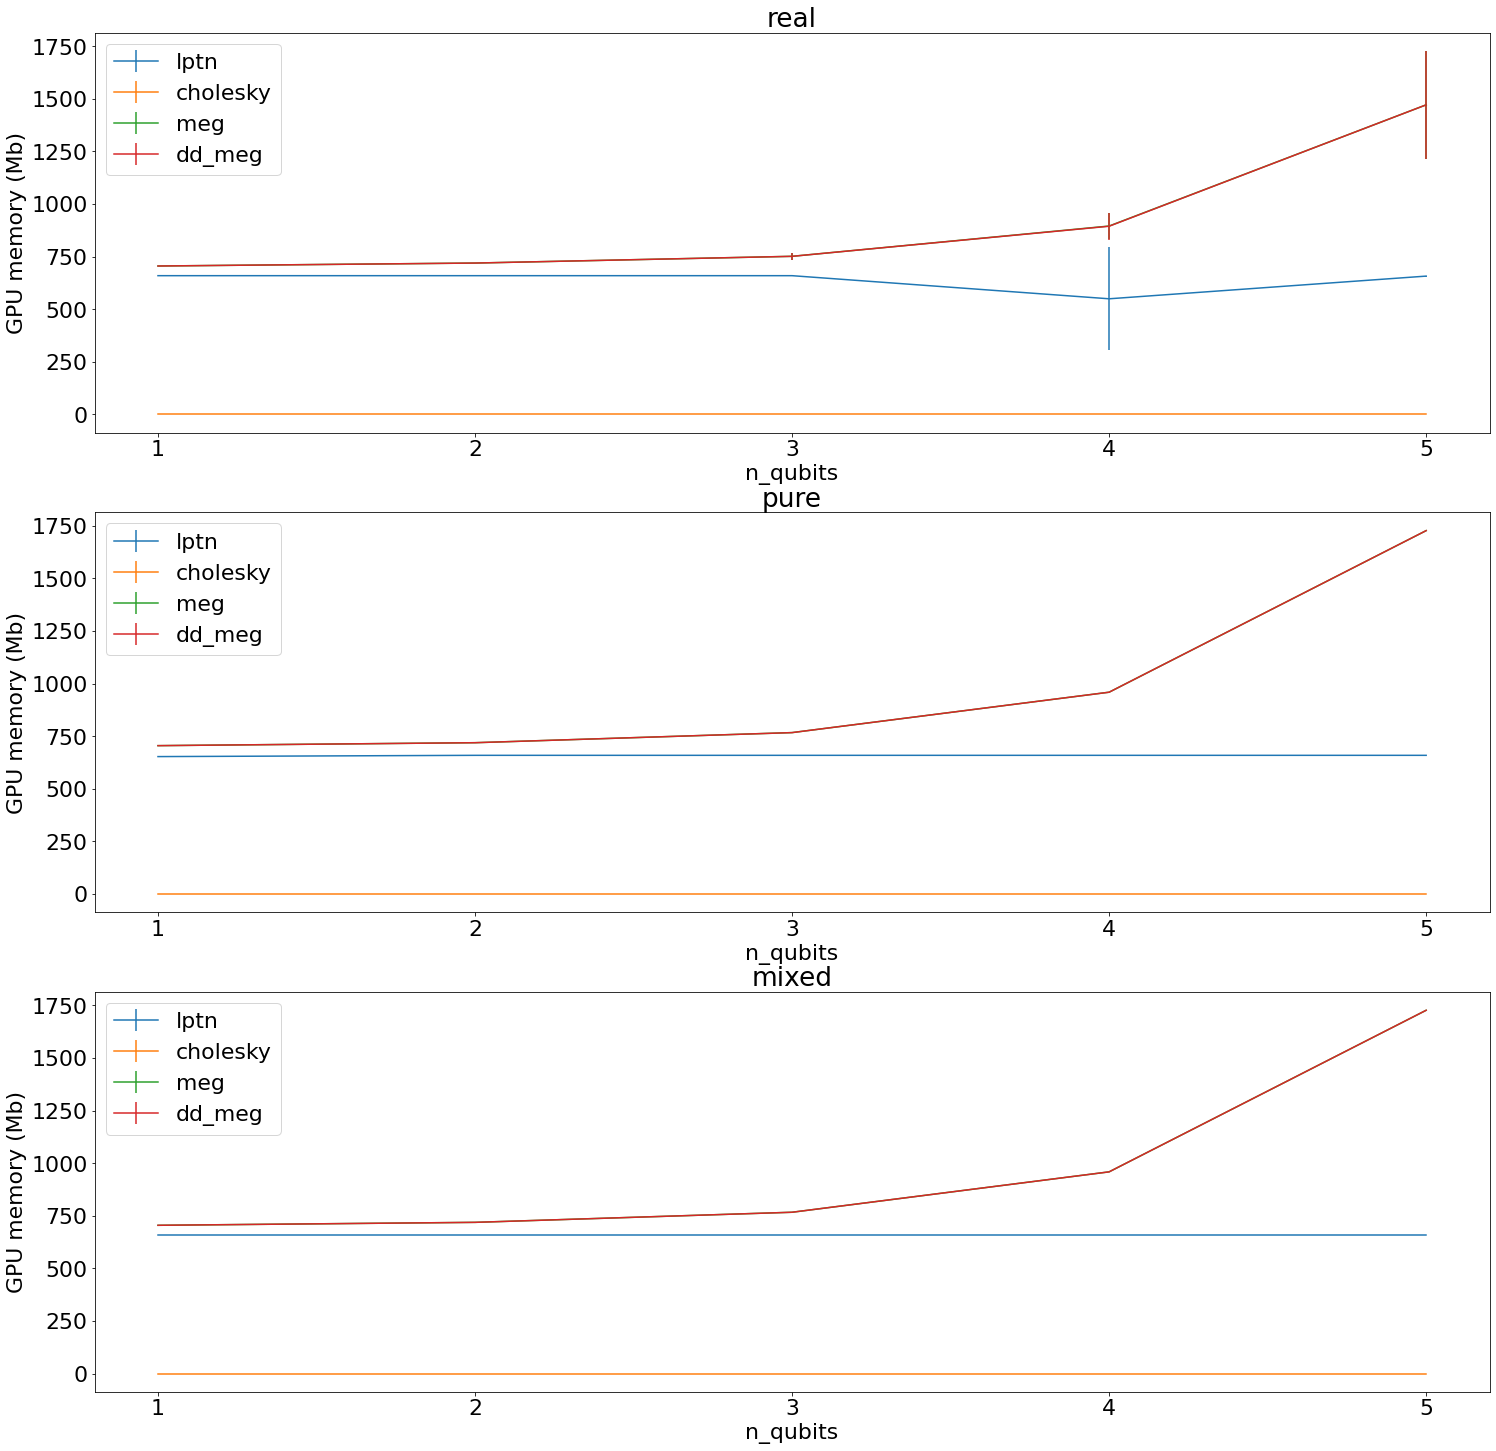

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(25,25))
plt.rcParams.update({'font.size': 22})

for i, data_type in enumerate(['real', 'pure', 'mixed']):
    algorithms = {'lptn': [], 'cholesky': [], 'meg': [], 'dd_meg': []}
    for algorithm in algorithms:
        for n_qubits in qubits_range:
            filtered_results = [res for res in results if all([res['args']['algorithm'] == algorithm, 
                                                               res['args']['data_type'] == data_type,
                                                               res['args']['n_qubits'] == n_qubits])]
            
            if len(filtered_results) == 0: 
                algorithms[algorithm].append((0,0))
                continue
            gpu_mem = np.array([[x.get('gpu_mem', 0) if not x.get('gpu_mem', 0) is None else 0 for x in res['results']] for res in filtered_results])
            if algorithm == 'lptn':
                tensor_ranks = np.array([res['args']['tensor_rank'] for res in filtered_results])
                gpu_mem = gpu_mem[tensor_ranks == max(tensor_ranks)]
            algorithms[algorithm].append((np.mean(gpu_mem), np.std(gpu_mem)))
    plt.subplot(3,1,i+1)
    plt.title(f'{data_type}')
    for algorithm_name, values in algorithms.items():
        plt.errorbar(qubits_range, [x[0] for x in values], yerr=[x[1] for x in values], label=algorithm_name)
        plt.xticks(qubits_range)
        plt.xlabel('n_qubits')
        plt.ylabel("GPU memory (Mb)")
#         plt.ylim((0,1))
#         plt.yscale('log')
    plt.legend()

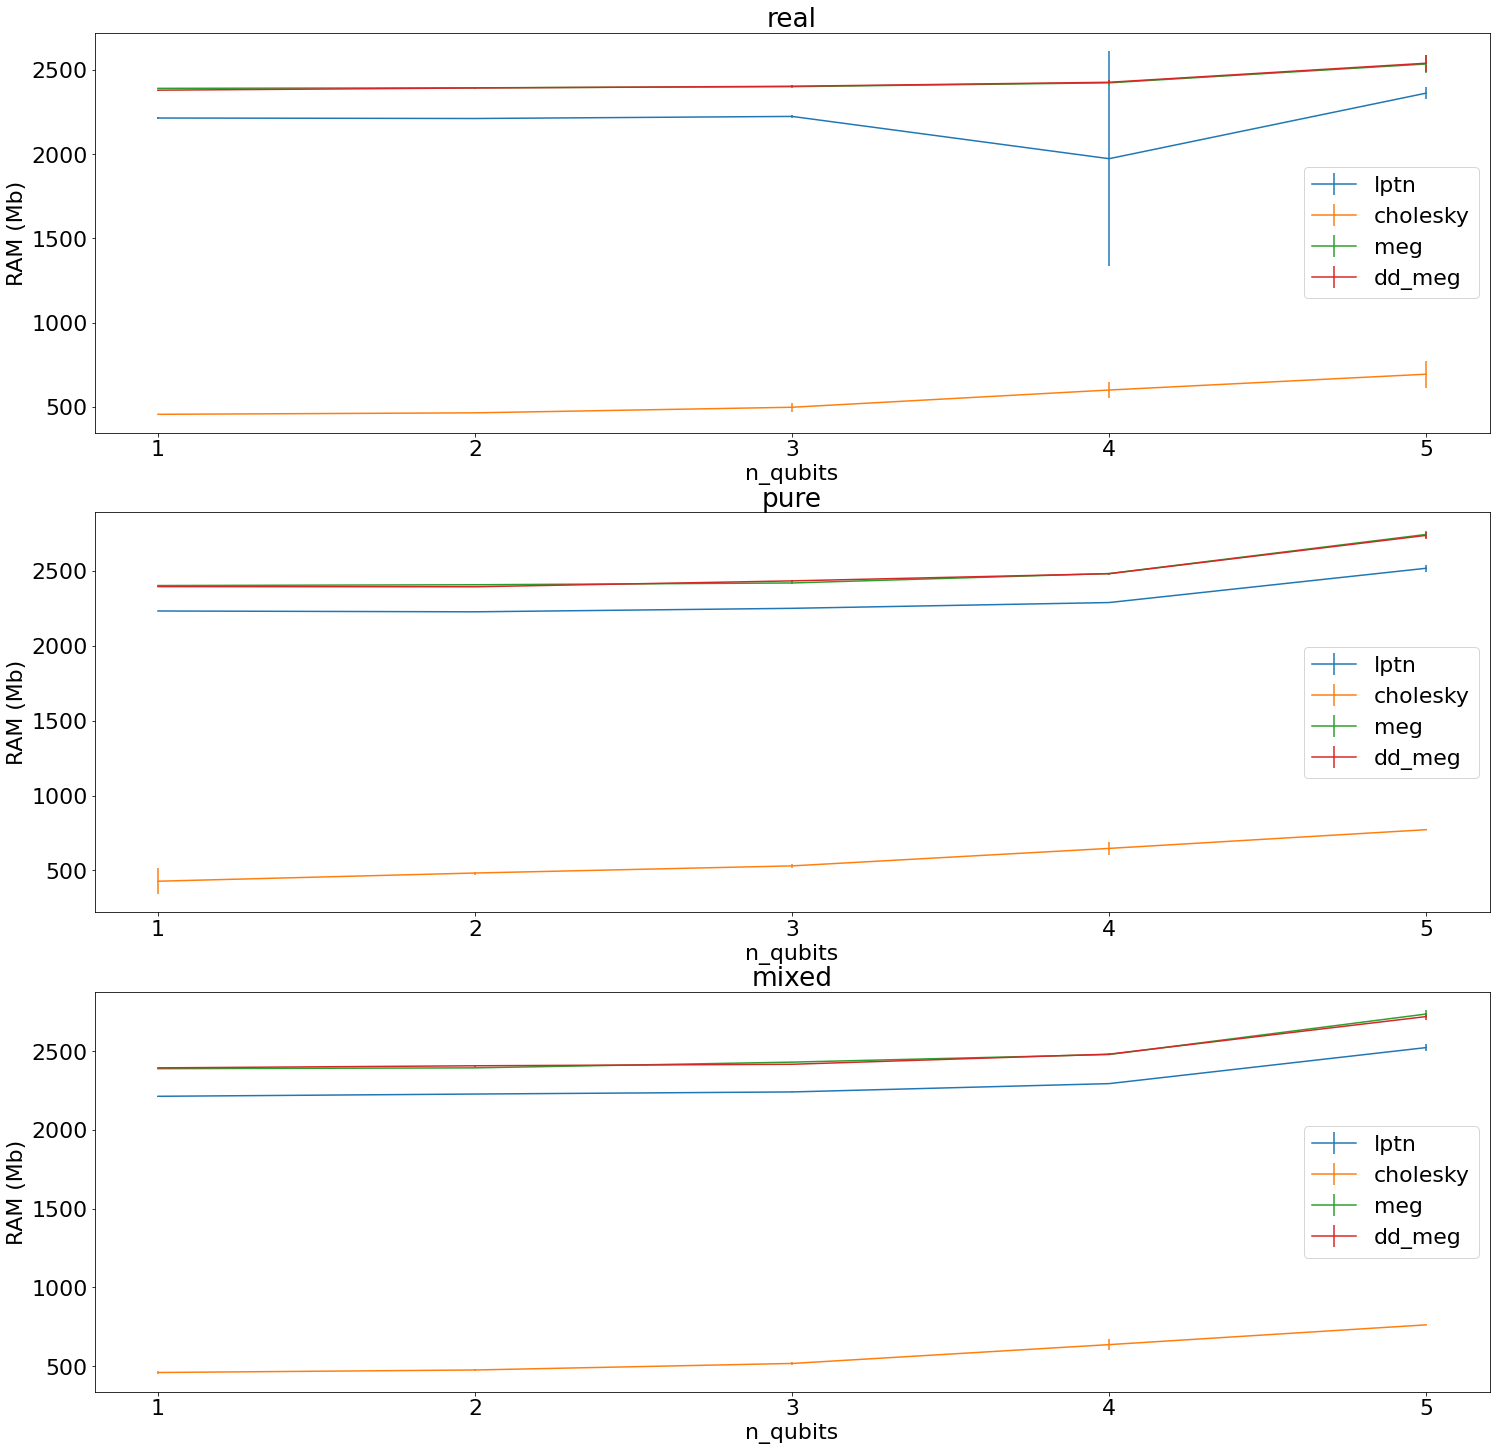

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(25,25))
plt.rcParams.update({'font.size': 22})

qubits_range = list(range(1, 6))

for i, data_type in enumerate(['real', 'pure', 'mixed']):
    algorithms = {'lptn': [], 'cholesky': [], 'meg': [], 'dd_meg': []}
    for algorithm in algorithms:
        for n_qubits in qubits_range:
            filtered_results = [res for res in results if all([res['args']['algorithm'] == algorithm, 
                                                               res['args']['data_type'] == data_type,
                                                               res['args']['n_qubits'] == n_qubits])]
            
            if len(filtered_results) == 0: 
                algorithms[algorithm].append((0,0))
                continue
            gpu_mem = np.array([[x.get('ram_mem', 0) if not x.get('ram_mem', 0) is None else 0 for x in res['results']] for res in filtered_results])
            if algorithm == 'lptn':
                tensor_ranks = np.array([res['args']['tensor_rank'] for res in filtered_results])
                gpu_mem = gpu_mem[tensor_ranks == max(tensor_ranks)]
            algorithms[algorithm].append((np.mean(gpu_mem), np.std(gpu_mem)))
    plt.subplot(3,1,i+1)
    plt.title(f'{data_type}')
    for algorithm_name, values in algorithms.items():
        plt.errorbar(qubits_range, [x[0] for x in values], yerr=[x[1] for x in values], label=algorithm_name)
        plt.xticks(qubits_range)
        plt.xlabel('n_qubits')
        plt.ylabel("RAM (Mb)")
#         plt.ylim((0,1))
#         plt.yscale('log')
    plt.legend()

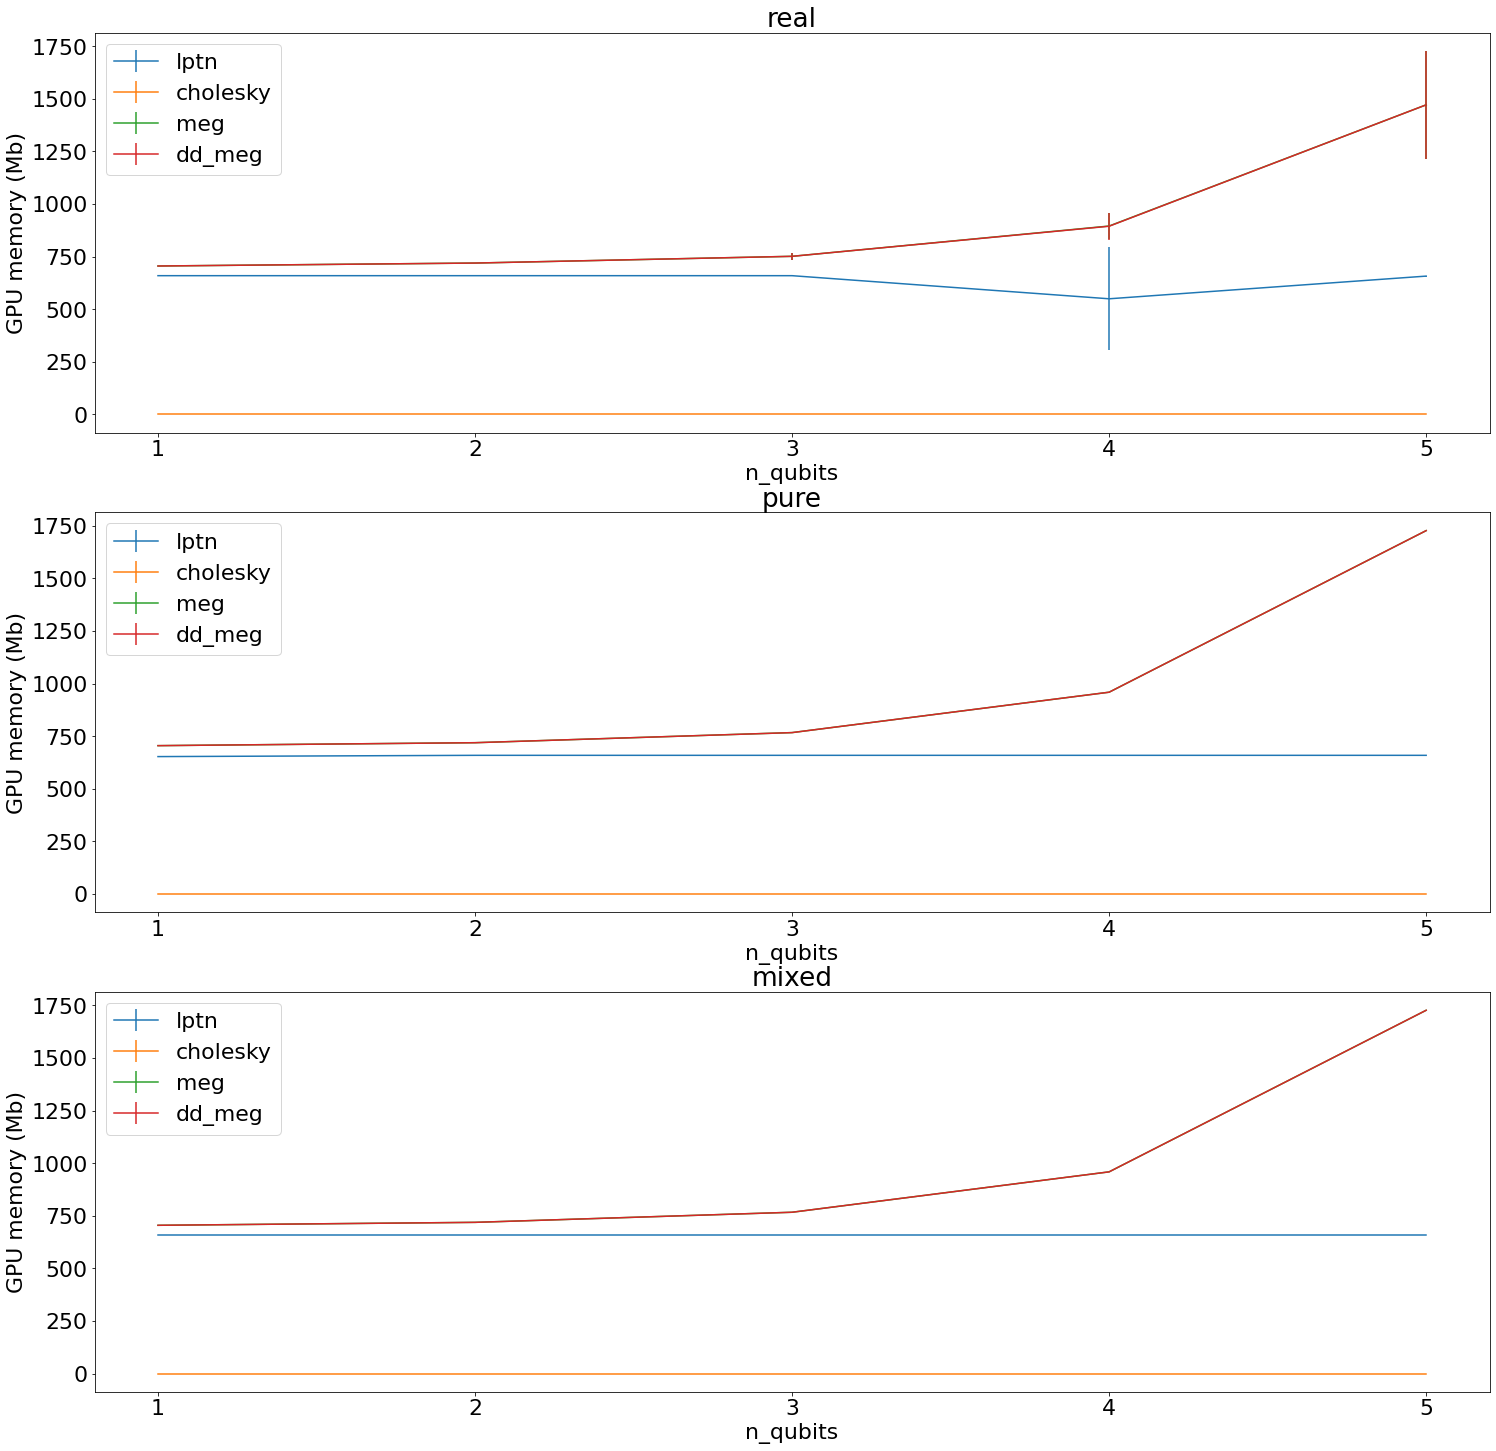

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(25,25))
plt.rcParams.update({'font.size': 22})

qubits_range = list(range(1, 6))

for i, data_type in enumerate(['real', 'pure', 'mixed']):
    algorithms = {'lptn': [], 'cholesky': [], 'meg': [], 'dd_meg': []}
    for algorithm in algorithms:
        for n_qubits in qubits_range:
            filtered_results = [res for res in results if all([res['args']['algorithm'] == algorithm, 
                                                               res['args']['data_type'] == data_type,
                                                               res['args']['n_qubits'] == n_qubits])]
            
            if len(filtered_results) == 0: 
                algorithms[algorithm].append((0,0))
                continue
            gpu_mem = np.array([[x.get('gpu_mem', 0) if not x.get('gpu_mem', 0) is None else 0 for x in res['results']] for res in filtered_results])
            if algorithm == 'lptn':
                tensor_ranks = np.array([res['args']['tensor_rank'] for res in filtered_results])
                gpu_mem = gpu_mem[tensor_ranks == max(tensor_ranks)]
            algorithms[algorithm].append((np.mean(gpu_mem), np.std(gpu_mem)))
    plt.subplot(3,1,i+1)
    plt.title(f'{data_type}')
    for algorithm_name, values in algorithms.items():
        plt.errorbar(qubits_range, [x[0] for x in values], yerr=[x[1] for x in values], label=algorithm_name)
        plt.xticks(qubits_range)
        plt.xlabel('n_qubits')
        plt.ylabel("GPU memory (Mb)")
#         plt.ylim((0,1))
#         plt.yscale('log')
    plt.legend()